In [106]:
using Revise
using JLD2
using Plots
import Tensor_FixedSeedMC as TCIMC
using LinearAlgebra
using Statistics
using LaTeXStrings

## tolerance1e-4

In [107]:
JLD2.@load "../TCI/tt_abo, tol0.0001.jld2" tt_abo
tt = tt_abo

┌ Warning: type TensorCrossInterpolation.TensorCI2{ComplexF64} does not exist in workspace; reconstructing
└ @ JLD2 /Users/sakurairihito/.julia/packages/JLD2/NKGUi/src/data/reconstructing_datatypes.jl:575


Reconstruct@TensorCI2{ComplexF64}(Any[[[Int64[]], [[100], [56], [31], [39], [37], [44], [38], [63], [36], [43], [40], [48], [45]]], [[[100], [1], [48], [23], [70], [83], [55], [92], [28], [39], [62], [34], [80]], [Int64[]]], [100, 100], Array{ComplexF64, 3}[[0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.001906978964396427 + 0.0im -0.00022671781892318055 + 0.0im -0.0010870987808463588 + 0.0im 0.004061222670990977 + 0.0im 0.010078547082145138 + 0.0im 0.00022202300925414933 + 0.0im 0.00897993629005522 + 0.0im 0.03478347607090233 + 0.0im -0.015530266798379985 + 0.0im 0.014800040752469677 + 0.0im -0.049144471224327024 + 0.0im -0.027686826874562365 + 0.0im -0.09819591003583003 + 0.0im -0.03512185414863277 + 0.0im 0.0 + 0.0im -0.0754238124889767 + 0.0im -0.10106141730362259 + 0.0im -0.09077142054571483 + 0.0im -0.08860435960286217 + 0.0im 0.0 + 0.

In [108]:
tt = tt.sitetensors

2-element Vector{Array{ComplexF64, 3}}:
 [0.0 + 0.0im 0.0 + 0.0im … 0.9537524280384099 + 0.0im 1.0 + 0.0im;;; 0.0 + 0.0im 0.0 + 0.0im … 0.058597644491080854 - 0.0im 0.0 + 0.0im;;; 0.0 + 0.0im 0.0 + 0.0im … -0.0034723913652848198 + 0.0im 0.0 + 0.0im;;; … ;;; 0.0 + 0.0im 0.0 + 0.0im … 0.022341548004992308 + 0.0im 0.0 + 0.0im;;; 0.0 + 0.0im 0.0 + 0.0im … 0.04422818028622927 - 0.0im 0.0 + 0.0im;;; 0.0 + 0.0im 0.0 + 0.0im … -0.09228899722237091 + 0.0im 0.0 + 0.0im]
 [15.386420947878483 + 0.0im 15.39414853148572 + 0.0im … 16.619030930633457 + 0.0im 16.635380930039968 + 0.0im; 4.717680015290708 + 0.0im 4.7410587866710765 + 0.0im … 6.8582860148859845 + 0.0im 6.878589514117582 + 0.0im; … ; 3.3557678875598334 + 0.0im 3.3778468204915697 + 0.0im … 5.241410746739684 + 0.0im 5.258679944883124 + 0.0im; 2.875262008882536 + 0.0im 2.89507661383101 + 0.0im … 4.570223532047358 + 0.0im 4.585308469682641 + 0.0im;;;]

## tolerance1e-3

In [109]:
JLD2.@load "../TCI/tt_abo, tol0.001.jld2" tt_abo
tt_1e_3 = tt_abo
tt_1e_3 = tt_1e_3.sitetensors
price_matrix_tci = zeros(100, 100)
for i in 1:100
    for j in 1:100
        price_matrix_tci[i, j] = TCIMC.tt_evaluate(tt_1e_3, [i, j])
    end
end
#res1_2 = tt_evaluate(tt, indexset)
price_matrix_tci
JLD2.@load "../MC/MCdata/price_matrix_asianbarrier_N_PATHS1000000.jld2" res
price_matrix_10_6 = res[1]
abs_err = abs.(price_matrix_10_6 .- price_matrix_tci)
maximum_abs_err = maximum(abs_err)
@show maximum_abs_err

maximum_abs_err = 0.016908685870919538


┌ Warning: type TensorCrossInterpolation.TensorCI2{ComplexF64} does not exist in workspace; reconstructing
└ @ JLD2 /Users/sakurairihito/.julia/packages/JLD2/NKGUi/src/data/reconstructing_datatypes.jl:575


0.016908685870919538

In [110]:
@show size(tt_1e_3[1])
@show size(tt_1e_3[2])
tol = 1e-4
TCIMC.compress!(tt_1e_3, tolerance=tol)
@show size(tt_1e_3[1])
@show size(tt_1e_3[2])

size(tt_1e_3[1]) = (1, 100, 3)
size(tt_1e_3[2]) = (3, 100, 1)
size(tt_1e_3[1]) = (1, 100, 3)
size(tt_1e_3[2]) = (3, 100, 1)


(3, 100, 1)

In [111]:
price_matrix_tci = zeros(100, 100)
for i in 1:100
    for j in 1:100
        price_matrix_tci[i, j] = TCIMC.tt_evaluate(tt_1e_3, [i, j])
    end
end
#res1_2 = tt_evaluate(tt, indexset)
price_matrix_tci
JLD2.@load "../svd/price_matrix_asianbarrier.jld2" price_matrix
price_matrix_10_6 = price_matrix
abs_err = abs.(price_matrix_10_6 .- price_matrix_tci)
maximum_abs_err = maximum(abs_err)
@show maximum_abs_err

maximum_abs_err = 0.009479263862750109


0.009479263862750109

## plots price

In [112]:
S0_values = range(90, stop=120, length=101)[1:end-1]
implied_vol_values = range(0.15, stop=0.25, length=101)[1:end-1]

0.15:0.001:0.249

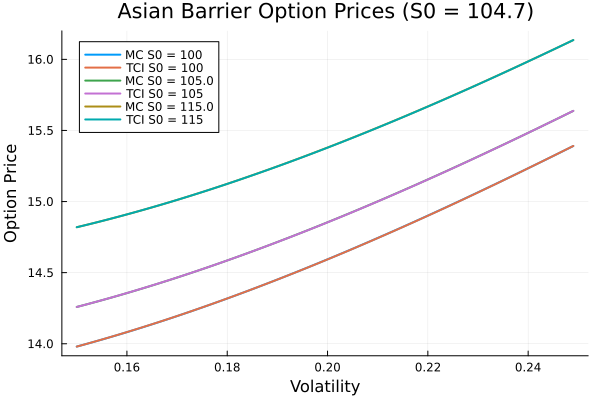

In [113]:
plot(implied_vol_values, price_matrix[95, :], xlabel="Volatility", ylabel="Option Price", 
     title="Asian Barrier Option Prices (S0 = 104.7)", label="MC S0 = 100", lw=2)
plot!(implied_vol_values, price_matrix_tci[95, :], label="TCI S0 = 100", lw=2)
plot!(implied_vol_values, price_matrix[96, :], label="MC S0 = 105.0", lw=2)
plot!(implied_vol_values, price_matrix_tci[96, :], label="TCI S0 = 105", lw=2)
plot!(implied_vol_values, price_matrix[98, :], label="MC S0 = 115.0", lw=2)
plot!(implied_vol_values, price_matrix_tci[98, :], label="TCI S0 = 115", lw=2)

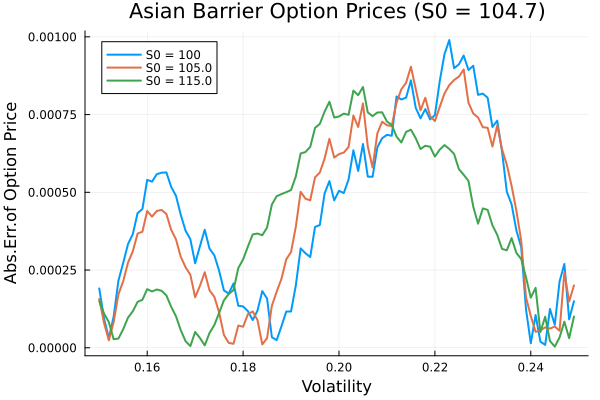

In [114]:
plot(implied_vol_values, abs.(price_matrix[95, :] - price_matrix_tci[95, :]), xlabel="Volatility", ylabel="Abs.Err.of Option Price", 
     title="Asian Barrier Option Prices (S0 = 104.7)", label="S0 = 100", lw=2)
plot!(implied_vol_values, abs.(price_matrix[96, :] - price_matrix_tci[96, :]), label="S0 = 105.0", lw=2)
plot!(implied_vol_values, abs.(price_matrix[98, :] - price_matrix_tci[98, :]), label="S0 = 115.0", lw=2)

In [115]:
diff_mat = TCIMC.diff_matrix(100, 0.001);

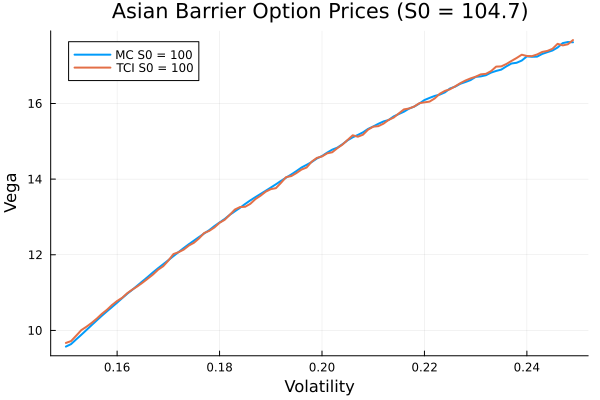

In [116]:
plot(implied_vol_values, diff_mat * price_matrix[95, :], xlabel="Volatility", ylabel="Vega", 
     title="Asian Barrier Option Prices (S0 = 104.7)", label="MC S0 = 100", lw=2)
plot!(implied_vol_values, diff_mat * price_matrix_tci[95, :], label="TCI S0 = 100", lw=2)
#plot!(implied_vol_values, diff_mat * price_matrix[96, :], label="MC S0 = 105.0", lw=2)
#plot!(implied_vol_values, diff_mat * price_matrix_tci[96, :], label="TCI S0 = 105", lw=2)
#plot!(implied_vol_values, diff_mat * price_matrix[98, :], label="MC S0 = 115.0", lw=2)
#plot!(implied_vol_values, diff_mat * price_matrix_tci[98, :], label="TCI S0 = 115", lw=2)

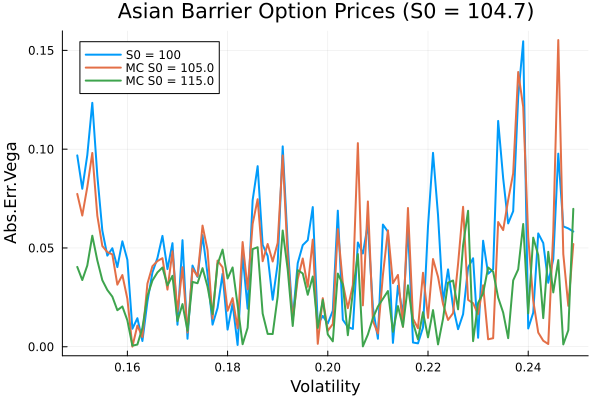

In [117]:
plot(implied_vol_values, abs.(diff_mat * price_matrix[95, :] .- diff_mat * price_matrix_tci[95, :]), xlabel="Volatility", ylabel="Abs.Err.Vega", 
     title="Asian Barrier Option Prices (S0 = 104.7)", label="S0 = 100", lw=2)
plot!(implied_vol_values, abs.(diff_mat * price_matrix[96, :] .- diff_mat * price_matrix_tci[96, :]), label="MC S0 = 105.0", lw=2)
plot!(implied_vol_values, abs.(diff_mat * price_matrix[98, :] .- diff_mat * price_matrix_tci[98, :]), label="MC S0 = 115.0", lw=2)

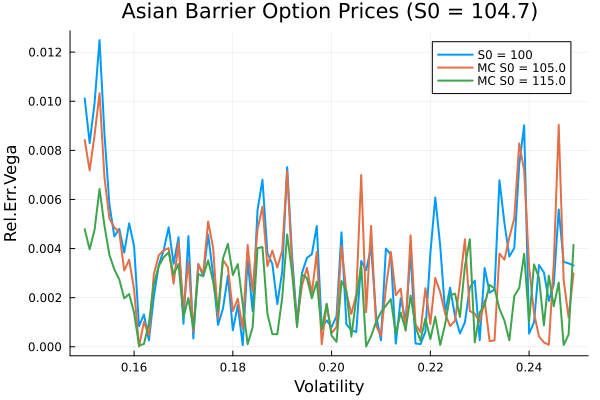

In [118]:
plot(implied_vol_values, abs.(diff_mat * price_matrix[95, :] .- diff_mat * price_matrix_tci[95, :]) ./ abs.(diff_mat * price_matrix[95, :]), xlabel="Volatility", ylabel="Rel.Err.Vega", 
     title="Asian Barrier Option Prices (S0 = 104.7)", label="S0 = 100", lw=2)
plot!(implied_vol_values, abs.(diff_mat * price_matrix[96, :] .- diff_mat * price_matrix_tci[96, :]) ./ abs.(diff_mat * price_matrix[96, :]), label="MC S0 = 105.0", lw=2)
plot!(implied_vol_values, abs.(diff_mat * price_matrix[98, :] .- diff_mat * price_matrix_tci[98, :]) ./ abs.(diff_mat * price_matrix[98, :]), label="MC S0 = 115.0", lw=2)

In [119]:
diff_mat = TCIMC.diff_matrix(100, 0.03);


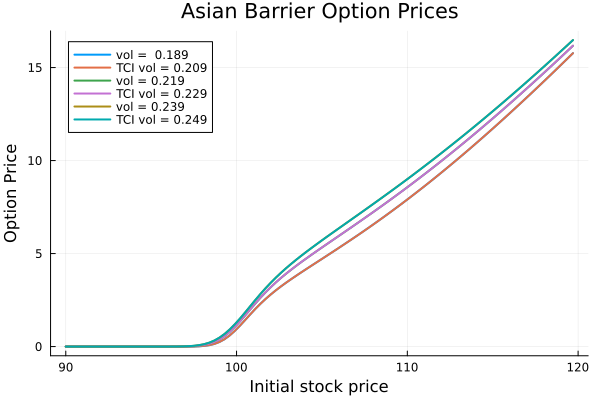

In [120]:
plot(S0_values, price_matrix[:, 40], xlabel="Initial stock price", ylabel="Option Price", 
     title="Asian Barrier Option Prices", label="vol =  0.189", lw=2)
plot!(S0_values, price_matrix_tci[:, 40], label="TCI vol = 0.209", lw=2)
plot!(S0_values, price_matrix[:, 70], label="vol = 0.219", lw=2)
plot!(S0_values, price_matrix_tci[:, 70], label="TCI vol = 0.229", lw=2)
plot!(S0_values, price_matrix[:, 90], label="vol = 0.239", lw=2)
plot!(S0_values, price_matrix_tci[:, 90], label="TCI vol = 0.249", lw=2)

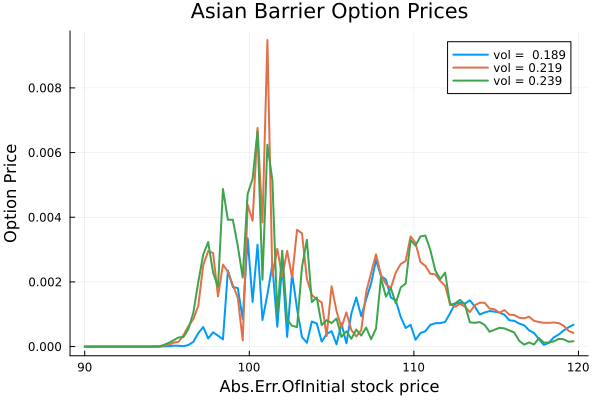

In [121]:
plot(S0_values, abs.(price_matrix[:, 40] .- price_matrix_tci[:, 40]), xlabel="Abs.Err.OfInitial stock price", ylabel="Option Price", 
     title="Asian Barrier Option Prices", label="vol =  0.189", lw=2)
plot!(S0_values, abs.(price_matrix[:, 70] .- price_matrix_tci[:, 70]), label="vol = 0.219", lw=2)
plot!(S0_values, abs.(price_matrix[:, 90] .- price_matrix_tci[:, 90]), label="vol = 0.239", lw=2)

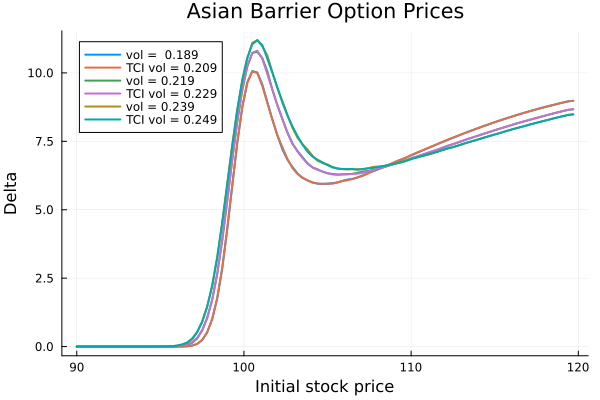

In [122]:
plot(S0_values, diff_mat * price_matrix[:, 40], xlabel="Initial stock price", ylabel="Delta", 
     title="Asian Barrier Option Prices", label="vol =  0.189", lw=2)
plot!(S0_values, diff_mat * price_matrix_tci[:, 40], label="TCI vol = 0.209", lw=2)
plot!(S0_values, diff_mat *price_matrix[:, 70], label="vol = 0.219", lw=2)
plot!(S0_values, diff_mat *price_matrix_tci[:, 70], label="TCI vol = 0.229", lw=2)
plot!(S0_values, diff_mat *price_matrix[:, 90], label="vol = 0.239", lw=2)
plot!(S0_values,diff_mat *price_matrix_tci[:, 90], label="TCI vol = 0.249", lw=2)

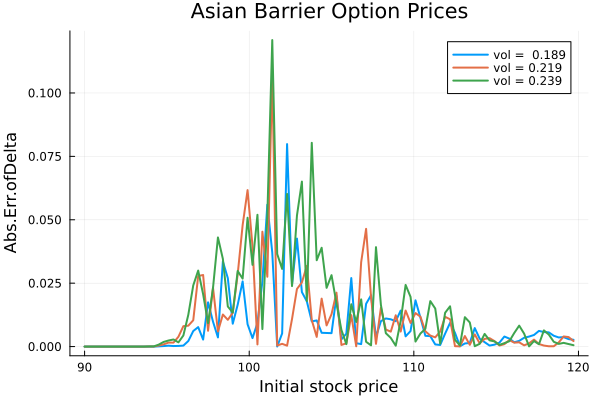

In [123]:
plot(S0_values, abs.(diff_mat * price_matrix[:, 40] .- diff_mat * price_matrix_tci[:, 40]), xlabel="Initial stock price", ylabel="Abs.Err.ofDelta", 
     title="Asian Barrier Option Prices", label="vol =  0.189", lw=2)


plot!(S0_values, abs.(diff_mat *price_matrix[:, 70] .- diff_mat *price_matrix_tci[:, 70]), label="vol = 0.219", lw=2)

plot!(S0_values, abs.(diff_mat *price_matrix[:, 90] .- diff_mat *price_matrix_tci[:, 90]), label="vol = 0.239", lw=2)


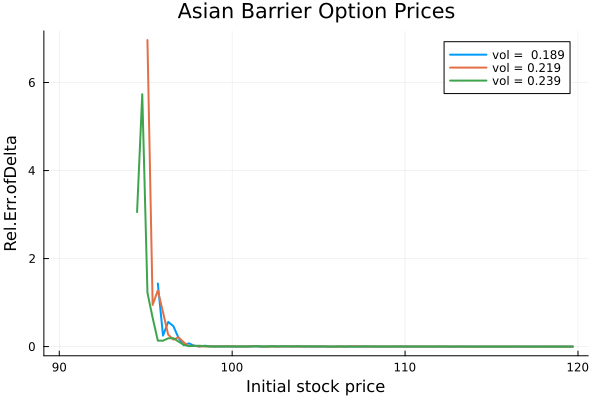

In [124]:
plot(S0_values, abs.(diff_mat * price_matrix[:, 40] .- diff_mat * price_matrix_tci[:, 40]) ./ abs.(diff_mat * price_matrix[:, 40]), xlabel="Initial stock price", ylabel="Rel.Err.ofDelta", 
     title="Asian Barrier Option Prices", label="vol =  0.189", lw=2)


plot!(S0_values, abs.(diff_mat *price_matrix[:, 70] .- diff_mat *price_matrix_tci[:, 70]) ./ abs.(diff_mat *price_matrix[:, 70]), label="vol = 0.219", lw=2)

plot!(S0_values, abs.(diff_mat *price_matrix[:, 90] .- diff_mat *price_matrix_tci[:, 90]) ./ abs.(diff_mat *price_matrix[:, 90]), label="vol = 0.239", lw=2)

In [125]:
diff_mat = TCIMC.second_diff_matrix(100, 0.03);

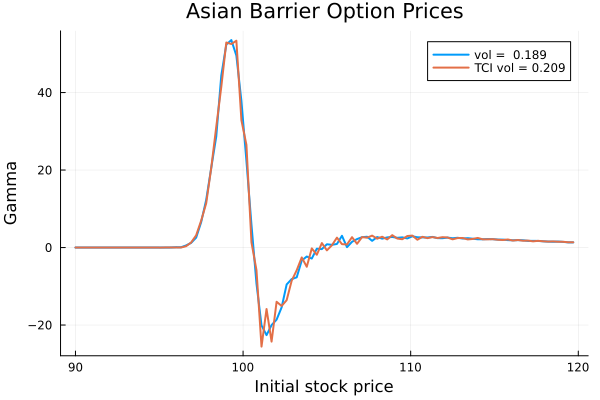

In [126]:
plot(S0_values, diff_mat * price_matrix[:, 40], xlabel="Initial stock price", ylabel="Gamma", 
     title="Asian Barrier Option Prices", label="vol =  0.189", lw=2)
plot!(S0_values, diff_mat * price_matrix_tci[:, 40], label="TCI vol = 0.209", lw=2)
###plot!(S0_values, diff_mat *price_matrix[:, 70], label="vol = 0.219", lw=2)
#plot!(S0_values, diff_mat *price_matrix_tci[:, 70], label="TCI vol = 0.229", lw=2)
#plot!(S0_values, diff_mat *price_matrix[:, 90], label="vol = 0.239", lw=2)
#plot!(S0_values,diff_mat *price_matrix_tci[:, 90], label="TCI vol = 0.249", lw=2)

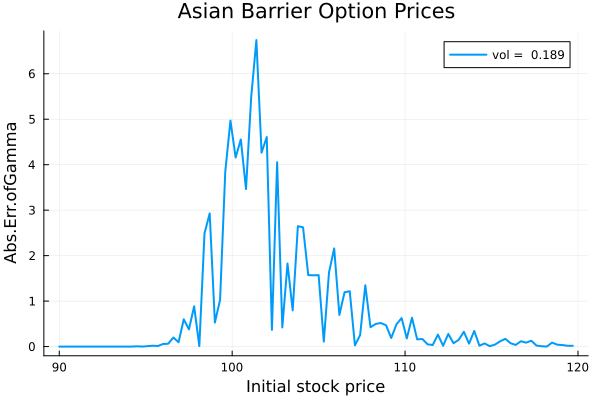

In [127]:
plot(S0_values, abs.(diff_mat * price_matrix[:, 40] .- diff_mat * price_matrix_tci[:, 40]), xlabel="Initial stock price", ylabel="Abs.Err.ofGamma", 
     title="Asian Barrier Option Prices", label="vol =  0.189", lw=2)

#plot!(S0_values, abs.(diff_mat *price_matrix[:, 70] .- diff_mat *price_matrix_tci[:, 70]), label="vol = 0.219", lw=2)

#plot!(S0_values, abs.(diff_mat *price_matrix[:, 90] .- diff_mat *price_matrix_tci[:, 90]), label="vol = 0.239", lw=2)


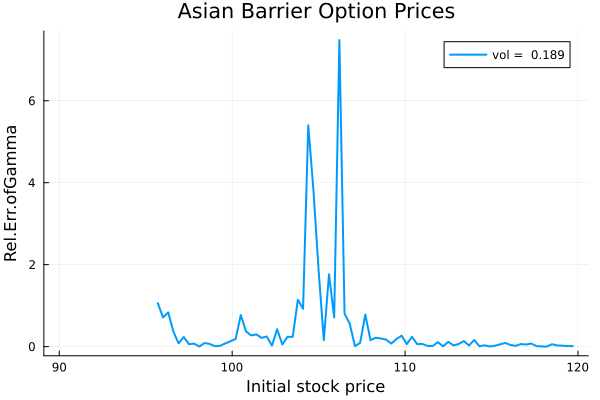

In [128]:
plot(S0_values, abs.(diff_mat * price_matrix[:, 40] .- diff_mat * price_matrix_tci[:, 40]) ./ abs.(diff_mat * price_matrix[:, 40]), xlabel="Initial stock price", ylabel="Rel.Err.ofGamma", 
     title="Asian Barrier Option Prices", label="vol =  0.189", lw=2)
